# Supervised Logistic Regression for Classification
<hr>

## 0. Import library

In [64]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>

The data features $x_i=(x_{i(1)},x_{i(2)})$ represent 2 exam grades $x_{i(1)}$ and $x_{i(2)}$ for each student $i$.

The data label $y_i$ indicates if the student $i$ was admitted (value is 1) or rejected (value is 0).

In [65]:
# import data with numpy
data = np.loadtxt('dataset.txt', delimiter=',')

# number of training data
n = data.shape[0]
print('Number of training data=',n)

Number of training data= 100


## 2. Explore the dataset distribution
<hr>

Plot the training data points.<br>

You may use matplotlib function `scatter(x,y)`.

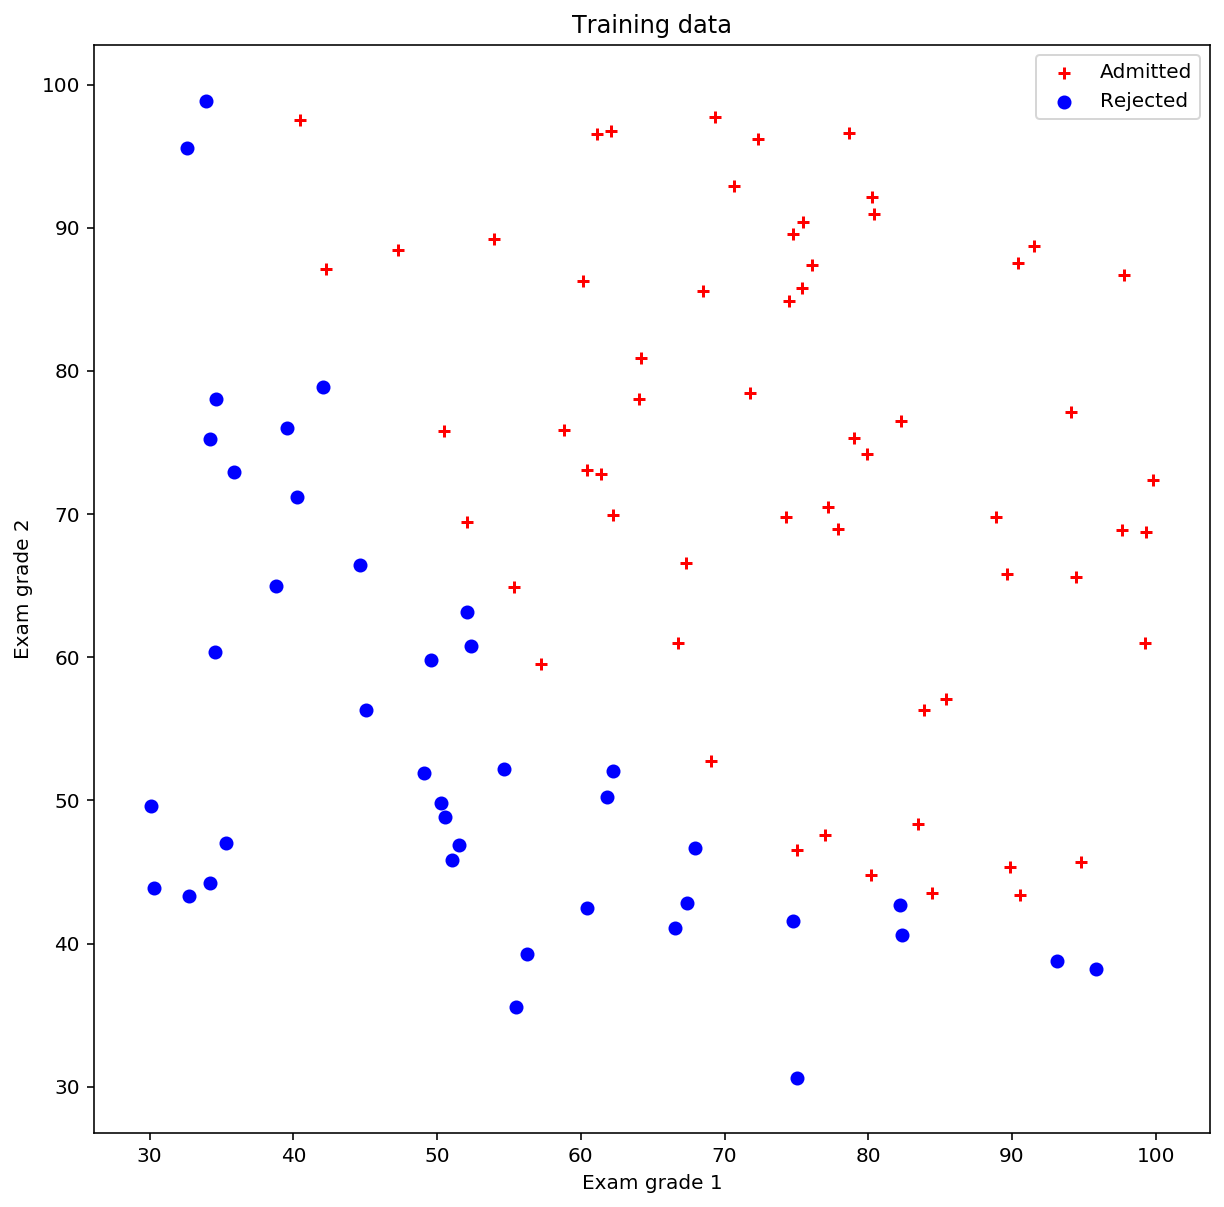

In [66]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

plt.figure(figsize = (10, 10))

admitted = None
rejected = None

for i in range(n):
    if idx_admit[i]:
        admitted = plt.scatter(x1[i], x2[i], marker = "+", color = 'r')
    else:
        rejected = plt.scatter(x1[i], x2[i], marker = 'o', color = 'b')


plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend((admitted, rejected), ("Admitted", "Rejected"))
plt.show()

## 3. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

Define and plot the sigmoid function for values in [-10,10]:

You may use functions `np.exp`, `np.linspace`.

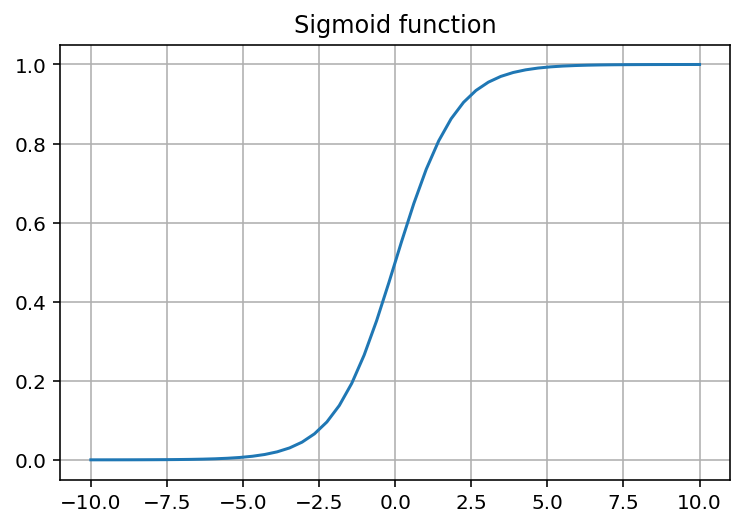

In [67]:
def sigmoid(z):
    
    sigmoid_f = 1 / (1 + np.exp(-z))
    
    return sigmoid_f 


# plot
x_values = np.linspace(-10,10)

plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 4. Define the prediction function for the classification
<hr>

#### The prediction function is defined by:

$$
\begin{aligned}
p_w(x) = \sigma(w_0 + w_1 x_{(1)} + w_2 x_{(2)}) = \sigma(w^T x)
\end{aligned}
$$

#### Implement the prediction function in a vectorised way as follows:

$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Use the new function `sigmoid`.

In [68]:
# construct the data matrix X
n = data.shape[0]
X = np.ones([n, 3])
X[:, 1] = data[:, 0]
X[:, 2] = data[:, 1]

# parameters vector
w = np.array([1, 1, 1]).reshape(3, 1)
# predictive function definition
def f_pred(X,w): 
    
    p = sigmoid(X.dot(w))
    
    return p

y_pred = f_pred(X,w)

## 5. Define the classification loss function 
<hr>

#### Mean Square Error

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( \sigma( w^T x_i ) - y_i \right)^2
$$

#### Cross-Entropy

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( - y_i \log( \sigma( w^T x_i ) ) - (1 - y_i) \log( 1 - \sigma( w^T x_i ) ) \right)
$$

#### The vectorized representation is for the mean square error is as follows:

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

#### The vectorized representation is for the cross-entropy error is as follows:

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

where

$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

You may use numpy functions `.T` and `np.log`.

In [69]:
def mse_loss(label, h_arr):  # mean square error 
    
    l = (h_arr - label).T.dot(h_arr - label).item() / label.shape[0]
    return np.mean(l)

def ce_loss(label, h_arr):  # cross-entropy error
    
    l = np.mean( np.sum( (-label.T).dot(np.log(h_arr)) - (1 - label).T.dot(np.log(1 - h_arr + 1e-7)), axis = 1 ) )

    return np.mean(l) 

## 6. Define the gradient of the classification loss function 
<hr>

#### Given the mean square loss

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Given the cross-entropy loss

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(p_w(x)-y)
$$

#### Implement the vectorized version of the gradient of the classification loss function

In [70]:
# loss function definition
def loss_logreg(y_pred,y,op): 
    
    n = len(y)
    if op == "mse":
        return mse_loss(y, y_pred) 
    else :
        return ce_loss(y, y_pred)

    

# Test loss function 
y = data[:,2][:,None] # label 
y_pred = f_pred(X,w) # prediction

loss = loss_logreg(y_pred, y, "mse")
#loss = loss_logreg(y_pred, y, "ce")

## 7. Implement the gradient descent algorithm 
<hr>

#### Vectorized implementation for the mean square loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Vectorized implementation for the cross-entropy loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T(p_w(x)-y)
$$

#### Plot the loss values $L(w^k)$ w.r.t. iteration $k$ the number of iterations for the both loss functions.

In [71]:
def grad_loss(y_pred, y, X, op):
    n = len(y)
    
    if op == "mse":
        return X.T.dot( (y_pred - y) * y_pred * (1 - y_pred) ) * 2 / n
    
    else:
        return X.T.dot( y_pred - y) * 2 / n 

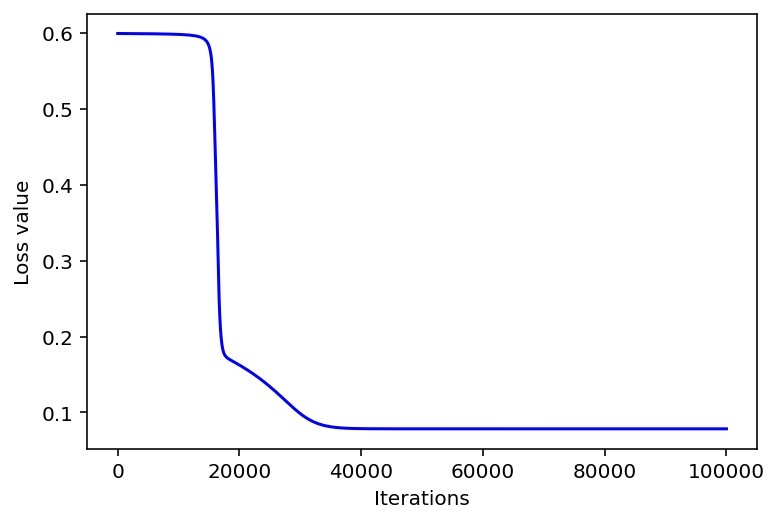

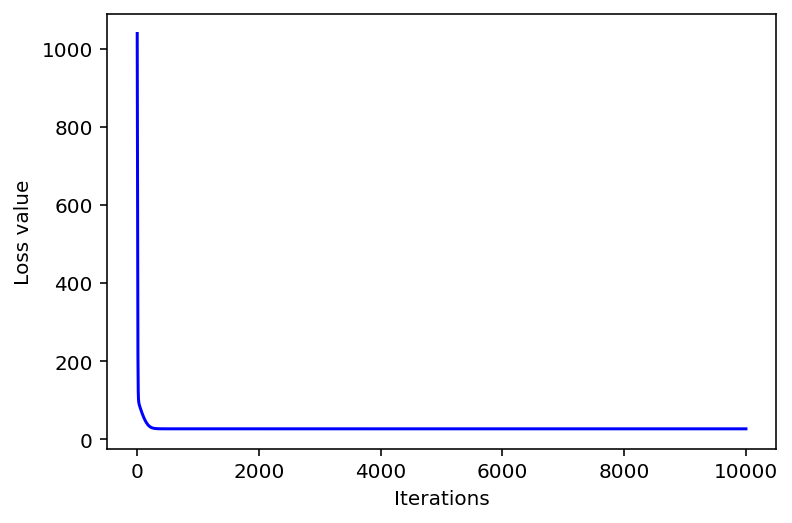

In [72]:
# gradient descent function definition
def grad_desc(X, y , op, w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    
    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w) # linear predicition function  
        grad_f = grad_loss(y_pred,y,X, op) # gradient of the loss 
        w = w - tau* grad_f # update rule of gradient descent 
        L_iters[i] = loss_logreg(y_pred,y, op) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters


#mse
# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.1])[:,None]
tau = 1e-5; max_iter = 100000
w, L_iters, w_iters = grad_desc(X,y,"mse",w_init,tau,max_iter)


# plot
plt.figure(3)
plt.plot(L_iters, color = 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


#ce
# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
tau = 1e-4; max_iter = 10000
w, L_iters, w_iters = grad_desc(X,y,"ce",w_init,tau,max_iter)


# plot
plt.figure(3)
plt.plot(L_iters, color = 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 8. Plot the decision boundary
<hr>

The decision boundary is defined by all points 

$$
x=(x_{(1)},x_{(2)}) \quad \textrm{ such that } \quad p_w(x) = 0.5
$$

You may use numpy and matplotlib functions `np.meshgrid`, `np.linspace`, `reshape`, `contour`.

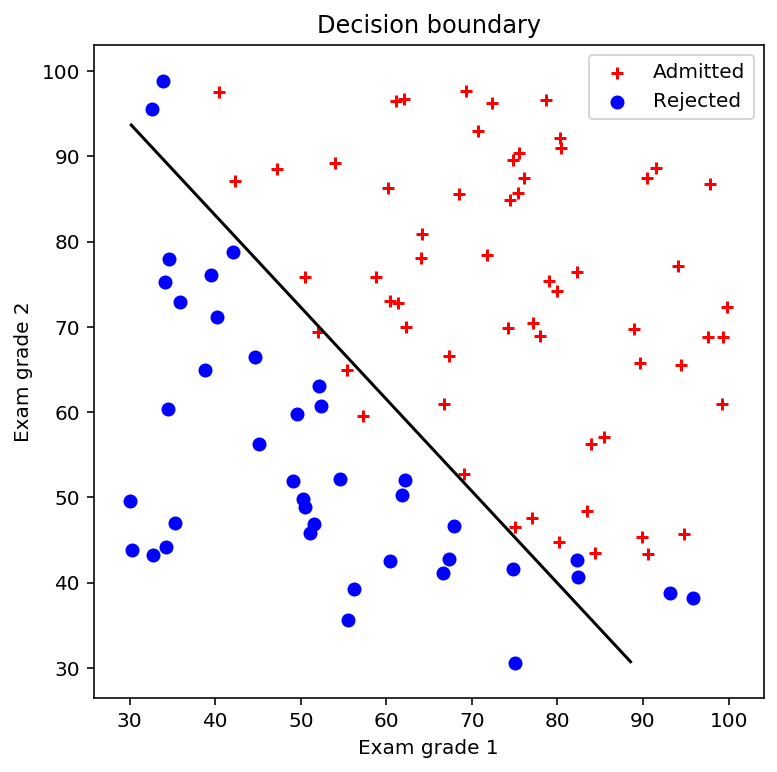

In [73]:
#ce
# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
tau = 1e-4; max_iter = 10000
w, L_iters, w_iters = grad_desc(X,y,"ce",w_init,tau,max_iter)

# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(50,50)


# plot
plt.figure(4,figsize=(6,6))

for i in range (n):
    if idx_admit[i]:
        admitted = plt.scatter(x1[i], x2[i], marker = "+", color = 'r')
    else:
        rejected = plt.scatter(x1[i], x2[i], marker = 'o', color = 'b')
plt.contour(xx1, xx2, p, levels = 1, colors='black')
    
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend((admitted, rejected), ("Admitted", "Rejected"))
plt.title('Decision boundary')
plt.show()

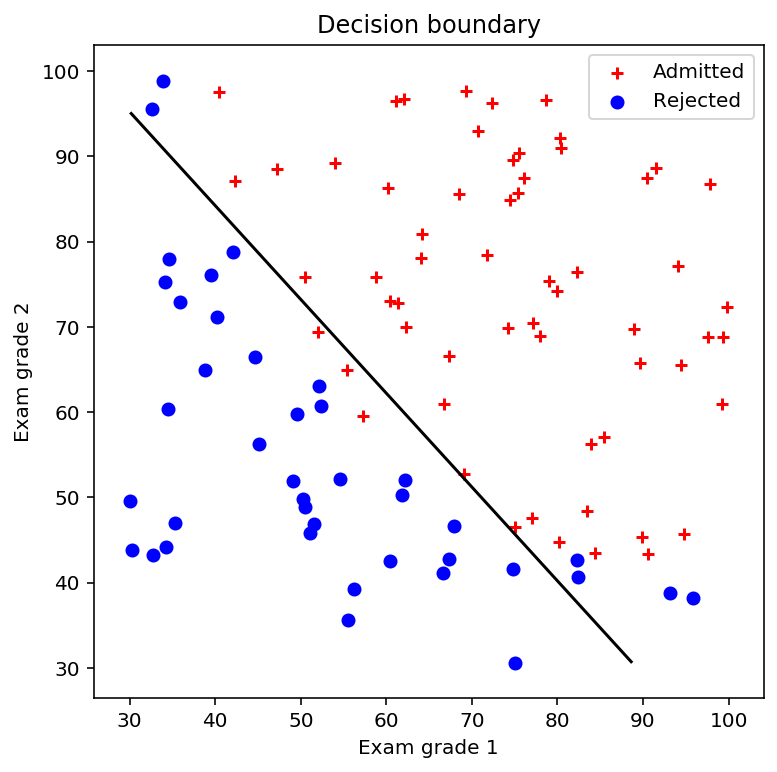

In [74]:
#mse
# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.1])[:,None]
tau = 1e-5; max_iter = 100000
w, L_iters, w_iters = grad_desc(X,y,"mse",w_init,tau,max_iter)

# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(50,50)


# plot
plt.figure(4,figsize=(6,6))

for i in range (n):
    if idx_admit[i]:
        admitted = plt.scatter(x1[i], x2[i], marker = "+", color = 'r')
    else:
        rejected = plt.scatter(x1[i], x2[i], marker = 'o', color = 'b')
plt.contour(xx1, xx2, p, levels = 1, colors='black')
    
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend((admitted, rejected), ("Admitted", "Rejected"))
plt.title('Decision boundary')
plt.show()

## 9. Comparison with Scikit-learn logistic regression algorithm with the gradient descent with the cross-entropy loss
<hr>

You may use scikit-learn function `LogisticRegression(C=1e6)`.

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


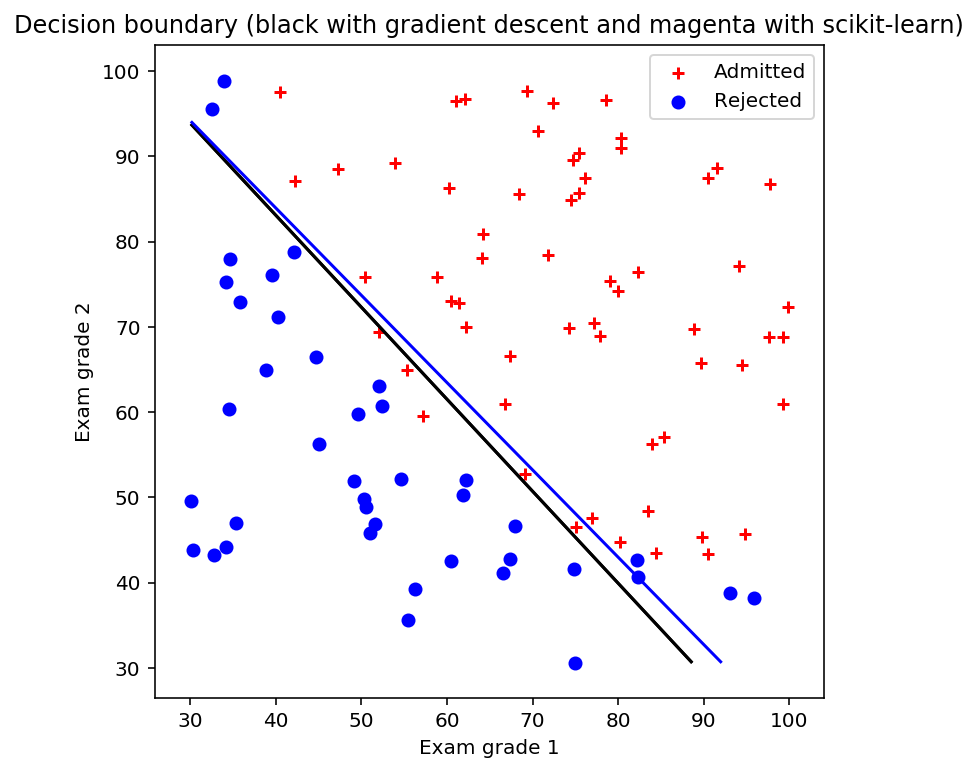

In [63]:
# run logistic regression with scikit-learn
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(np.array(data[:, 0: 2]).reshape(-1, 2), y) # learn the model parameters 

# compute loss value
w_sklearn = np.zeros([3,1])
w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:3,0] = logreg_sklearn.coef_
loss_sklearn = loss_logreg( f_pred(X, w_sklearn), y, "ce" )

# plot
plt.figure(4,figsize=(6,6))

for i in range (n):
    if idx_admit[i]:
        admitted = plt.scatter(x1[i], x2[i], marker = "+", color = 'r')
    else:
        rejected = plt.scatter(x1[i], x2[i], marker = 'o', color = 'b')

plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # grade 2

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)


w, L_iters, w_iters = grad_desc(X, y, "ce", w_init, tau, max_iter) 
p = f_pred(X2,w)
p = p.reshape(50, 50)
plt.contour(xx1, xx2, p, levels = 1, colors='black')

p = f_pred(X2, w)
p = p.reshape(50, 50)
plt.contour(xx1, xx2, p, levels = 1, colors='black')

p = f_pred(X2, w_sklearn)
p = p.reshape(50, 50)
plt.contour(xx1, xx2, p, levels = 1, colors='blue')

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.legend((admitted, rejected), ("Admitted", "Rejected"))
plt.show()



## 10. Plot the probability map

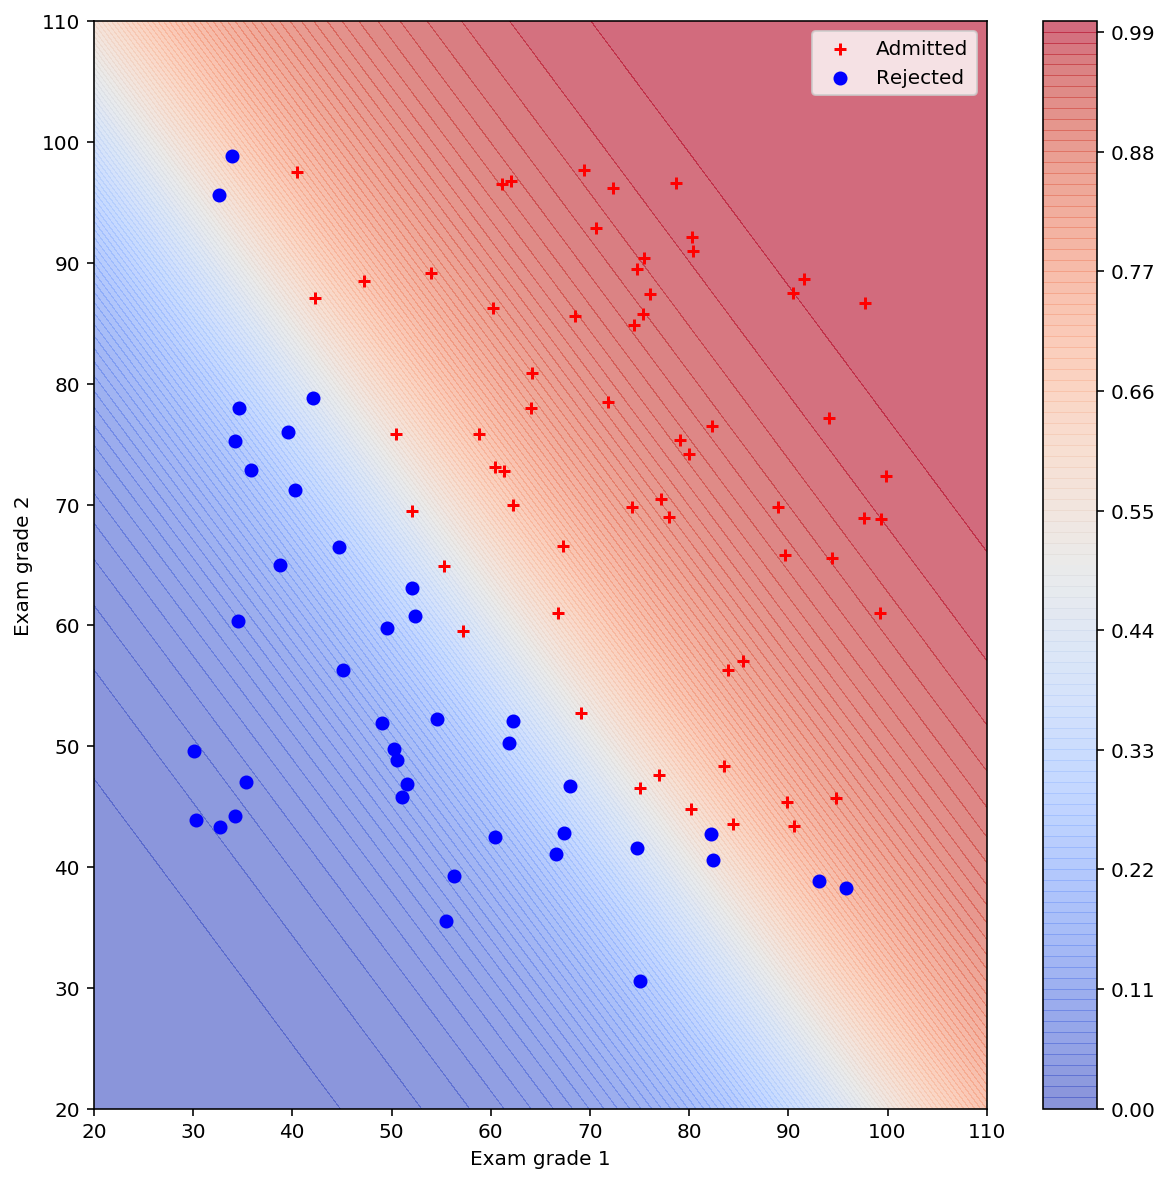

In [79]:
num_a = 110
grid_x1 = np.linspace(20,110,num_a)
grid_x2 = np.linspace(20,110,num_a)

score_x1, score_x2 = np.meshgrid(grid_x1, grid_x2 )

Z = np.zeros((len(score_x2), len(score_x1)))

for i in range(len(score_x1)): 
    for j in range(len(score_x2)):
        
            predict_prob = sigmoid( w[0] + w[1]*score_x1[j][i] + w[2]*score_x2[j][i])

            Z[j, i] = predict_prob
            
            # actual plotting example
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.tick_params( )
ax.set_xlabel('Exam grade 1')
ax.set_ylabel('Exam grade 2')

ax.set_xlim(20, 110)
ax.set_ylim(20, 110)

cf = ax.contourf(score_x1, score_x2, Z, levels = 100, cmap = "coolwarm", alpha = 0.6)
for i in range(n):
    if idx_admit[i]:
        admitted = ax.scatter(x1[i], x2[i], marker = "+", color = 'r')
    else:
        rejected = ax.scatter(x1[i], x2[i], marker = 'o', color = 'b')

cbar = fig.colorbar(cf)
cbar.update_ticks()

plt.legend((admitted, rejected), ("Admitted", "Rejected"))
plt.show()

In [ ]:
#mse
w_init = np.array([-10,0.1,-0.2])[:,None]
tau = 1e-5; max_iter = 100000
mse_w, mse_L_iters, w_iters = grad_desc(X,y,"mse",w_init,tau,max_iter)


#ce
# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
tau = 1e-4; max_iter = 10000
ce_w, ce_L_iters, w_iters = grad_desc(X,y,"ce",w_init,tau,max_iter)

x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

X2 = np.ones([np.prod(xx1.shape),3])
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)

mseH = (f_pred(X2, mse_w)).reshape(50,50)
ceH = (f_pred(X2, ce_w)).reshape(50,50)
skH = (f_pred(X2, w_sklearn)).reshape(50,50)


num_a = 110
grid_x1 = np.linspace(20,110,num_a) 
grid_x2 = np.linspace(20,110,num_a)
score_x1, score_x2 = np.meshgrid( grid_x1, grid_x2 )

mseZ = np.zeros((len(score_x2), len(score_x1)))
ceZ = np.zeros((len(score_x2), len(score_x1)))

for i in range(len(score_x1)): 
    for j in range(len(score_x2)):
            predict_prob = sigmoid( mse_w[0] + mse_w[1]*score_x1[j][i] + ms_w[2]*score_x2[j][i])
            predict_prob = sigmoid( ce_w[0] + ce_w[1]*score_x1[j][i] + ms_w[2]*score_x2[j][i])
            
            mseZ[j, i] = predict_prob
